# SToP clinic data Analysis

In [20]:
import csv
import matplotlib as plt
import matplotlib.pyplot as plt

import datetime

In [2]:
#Read the data
data = []
#Read all 5 community files.
for a in range (1, 6):
    temp_data = []
    with open(r'C:\Users\EPan\Documents\STOP\Community Data\Community{}.csv'.format(a)) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            temp_data.append(row)
    data.append(temp_data)
    
#Read the data for medications
data_med = []
#Read all 5 community files.
for a in range (1, 6):
    temp_data = []
    with open(r'C:\Users\EPan\Documents\STOP\Community Data\Community{}_med.csv'.format(a)) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            temp_data.append(row)
    data_med.append(temp_data)

In [3]:
Category_dictionary = {}

#Create the Categories
Category_dictionary["Cuts and Wounds"] = ["dressing", "laceration", "cut", "wound", "bite"]
Category_dictionary["Boil and Abscess"] = ["boil", "abscess"]
Category_dictionary["Rash"] = ["rash"]
Category_dictionary["Impetigo"] = ["sores", "impetigo", "pyoderma", "school sores", "purulent", "crusted"]
Category_dictionary["Fungal Infections"] = ["fungal", "tinea", "ring worm", "scaly skin"]
Category_dictionary["Headlice"] = ["lice", "nit", "head lice", "scalp infestation"]
Category_dictionary["Eczema"] = ["dermatitis", "eczema", "atopic dermatitis", "infected eczema"]
Category_dictionary["Warts"] = ["wart", "molluscum"]
Category_dictionary["Scabies"] = ["scabies", "scabetic", "secondarily infected scabies", "impetiginous scabies"]
Category_dictionary["Skin"] = ["skin"] # Not required in the tables and plots

#Reverse the keys with individual components of the dictionary
group_dict = {}
for key in Category_dictionary:
    for a in range (0, len(Category_dictionary[key])):
        group_dict[Category_dictionary[key][a]] = key

In [129]:
#Remove duplicates from the same category

In [4]:
for community in data:
    delete_array = []
    for a in range (0, len(community)):
        group_1 = group_dict[community[a][0]]
        temp_id_1 = community[a][1]
        temp_date_1 = community[a][2]

        for b in range (a + 1, len(community)):
            group_2 = group_dict[community[b][0]]
            temp_id_2 = community[b][1]
            temp_date_2 = community[b][2]

            if group_1 == group_2 and temp_id_1 == temp_id_2 and temp_date_1 == temp_date_2:
                delete_array.append(b)
    delete_array.sort()

    #delete any duplicate deletes 
    a = 1
    while a < len(delete_array):
        if delete_array[-a] == delete_array[-a-1]:
            del delete_array[-a]
        a = a + 1

    delete_array.sort(reverse=True)
    for a in range (0, len(delete_array)):
        del community[delete_array[a]]

In [5]:
Months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Print to CSV
f = open('SToP_tables.csv', 'w', newline='')
# create the csv writer
writer = csv.writer(f, delimiter=',')

#PrinT Results to CSV and save to an array for plotting
Plot_array = []
for community_number in range (0, len(data)):
    
    temp_plotarray = []
    Group_Total = {}
    for key in Category_dictionary:
        Group_Total[key] = [0]*75
    Group_Total["Total"] = [0]*75 #An entry for the total number of skin related primary presentations.

    for a in range (0, len(data[community_number])):
        group = group_dict[data[community_number][a][0]]
        date = data[community_number][a][2]
        year = int(date.split("-")[0])
        month = int(date.split("-")[1]) - 1
        column = (year - 2017) * 12 + month

        #Add to the total of group_total
        if  column < 75:
            Group_Total[group][column] = Group_Total[group][column] + 1
            #if column == 0:
                #print(group, date, column)
                
    #Find total
    for key in Group_Total:
        if key != "Skin" and key != "Total":
            for a in range (0, len(Group_Total[key])):
                Group_Total["Total"][a] = Group_Total["Total"][a] + Group_Total[key][a]
                
    #Header
    Headings = ["Community {}".format(community_number + 1)]
    for a in range (0, 75):
        #print(a, 2017 + int(a / 12), Months[a % 12])
        temp_string = "{}-{}".format(2017 + int(a / 12), Months[a % 12])
        Headings.append(temp_string)
    writer.writerow(Headings)

    temp = []
    for key in Group_Total:
        if key != "Skin":
            Group_Total[key].insert(0, key)
            writer.writerow(Group_Total[key])
            #print(community_number, key)
            temp_plotarray.append(Group_Total[key])
            temp.append(Group_Total[key])
    Plot_array.append(temp)

f.close()

In [6]:
#R version Stop Tables - Rearraynge the data so that the data is arranged in Columns rather than rows.

# data = []
# with open("SToP_tables.csv") as csv_file:
#     csv_reader = csv.reader(csv_file, delimiter=',')
#     for row in csv_reader:
#         data.append(row)
        
# # Print to CSV
# f = open('SToP_tables_R.csv', 'w', newline='') #R version of the tables
# # create the csv writer
# writer = csv.writer(f, delimiter=',')

# for a in range (0, len(data[0])):
#     temp = []
#     for b in range (0, len(data)):
#         temp.append(data[b][a])
#     writer.writerow(temp)
    
# f.close()

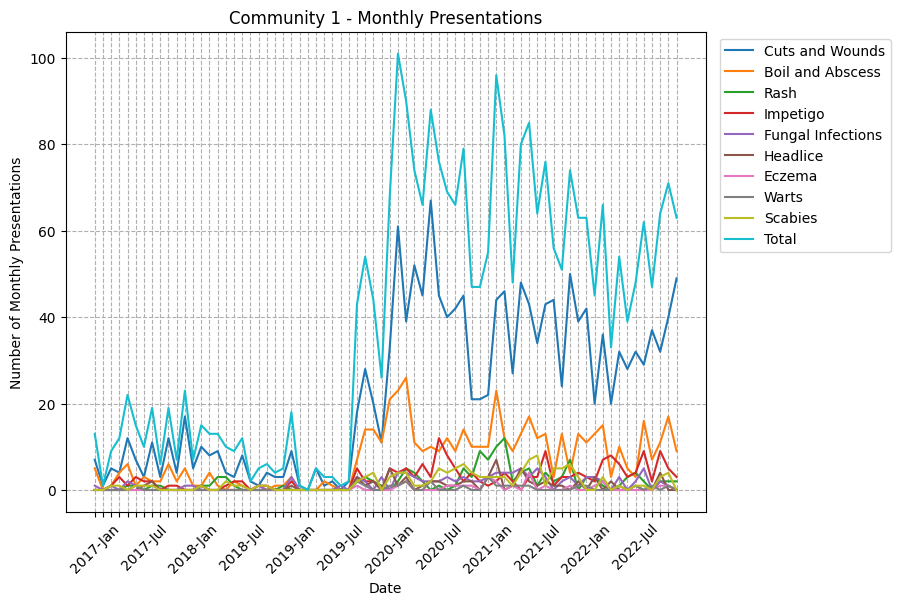

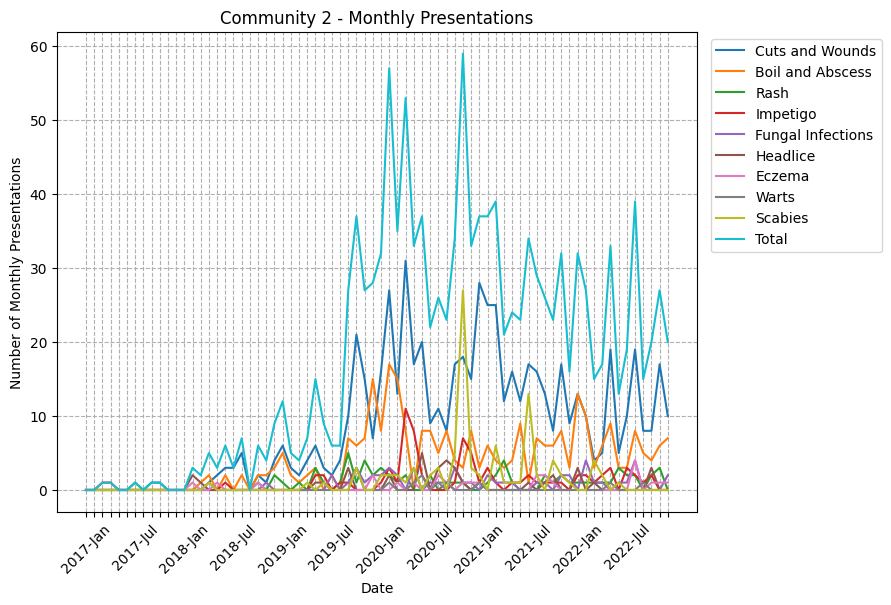

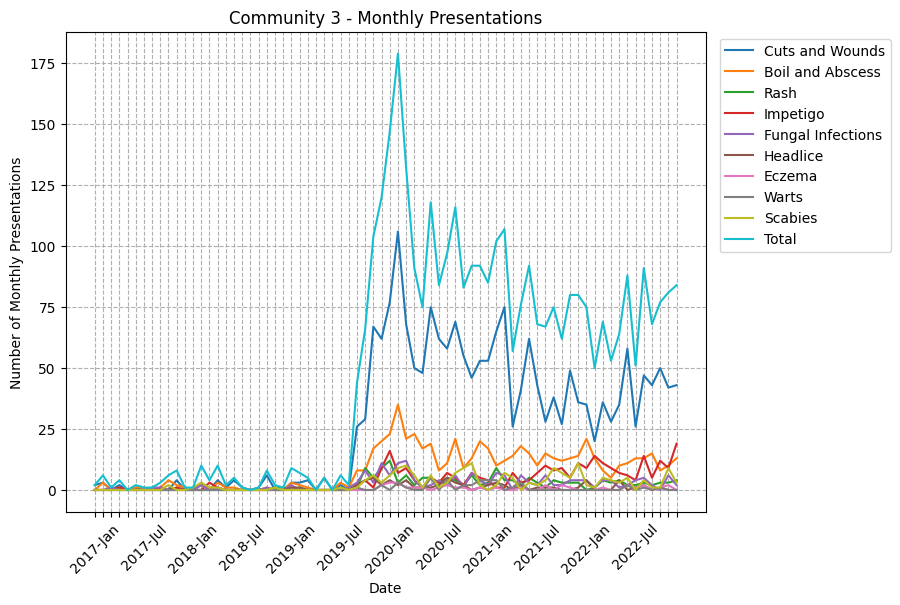

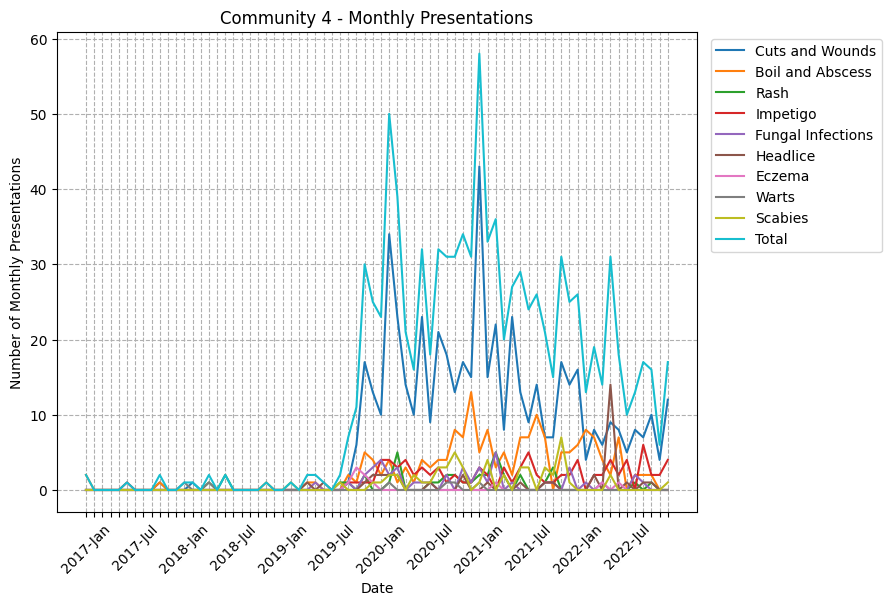

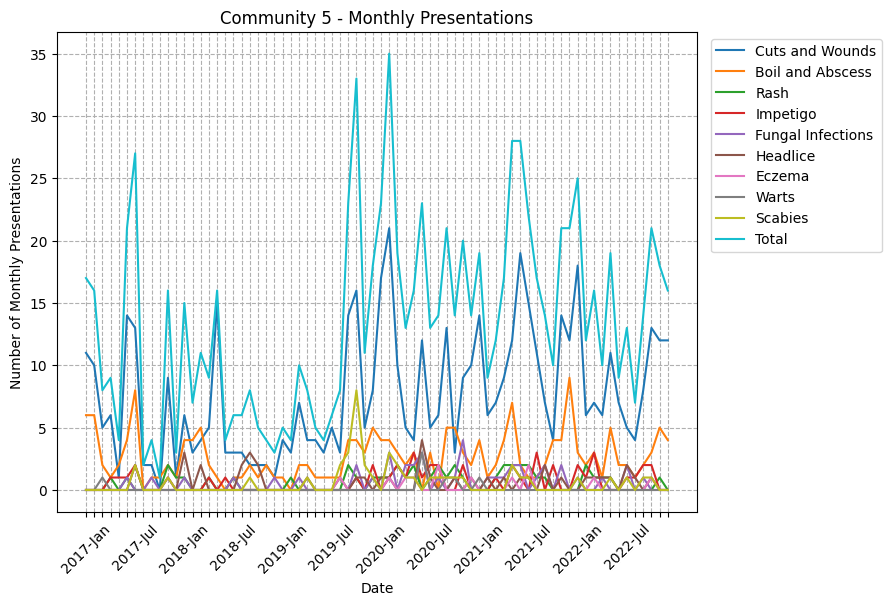

In [7]:
#PLOT BY COMMUNITY
for a in range (0, len(Plot_array)):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    for b in range (0, len(Plot_array[a])):
        ax.plot(Headings[1:-3], Plot_array[a][b][1:-3], label=Plot_array[a][b][0])

    #Show every 6 months
    temp = ax.xaxis.get_ticklabels()
    temp = list(set(temp) - set(temp[::6]))
    for label in temp:
        label.set_visible(False)

    plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
    plt.grid(True, linestyle="dashed")
    plt.legend(bbox_to_anchor=(1.3,1), loc="upper right")
    
    plt.title("Community {} - Monthly Presentations".format(a + 1))
    plt.ylabel("Number of Monthly Presentations")
    plt.xlabel("Date")
    plt.savefig('Community {}.png'.format(a + 1),dpi=300, bbox_inches = "tight")
    
    plt.show()

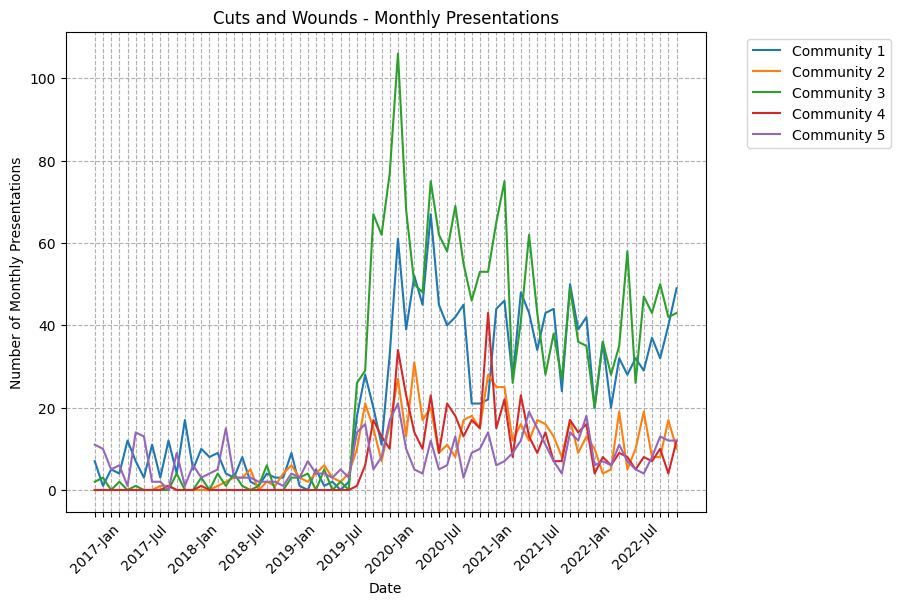

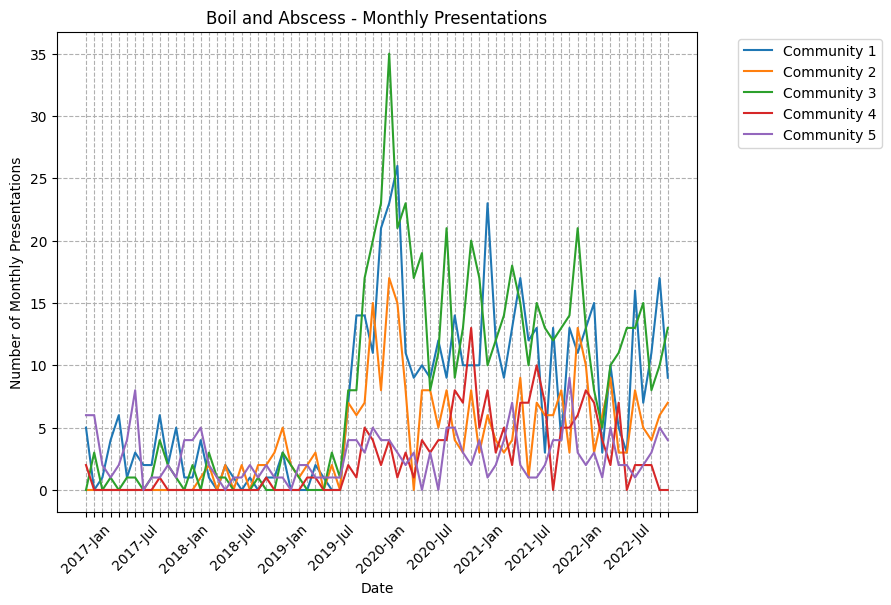

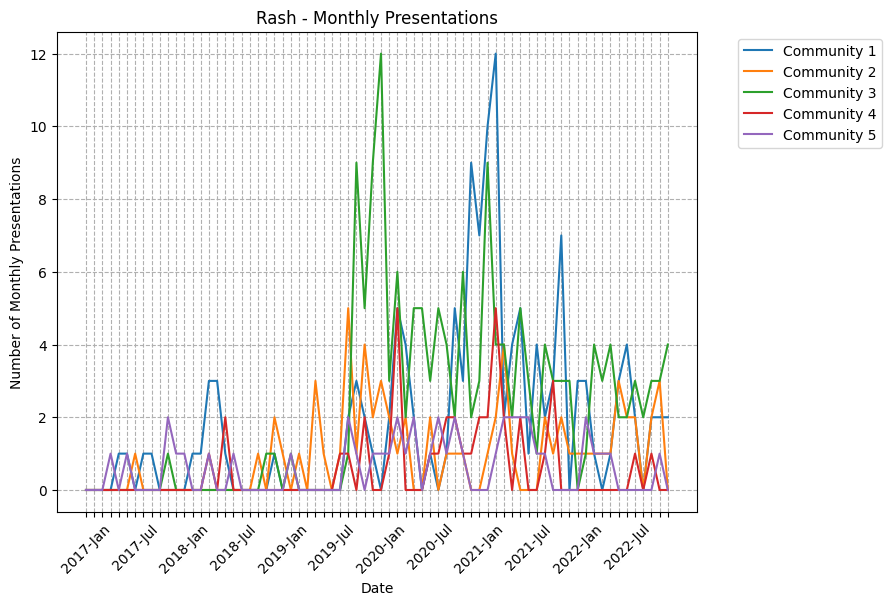

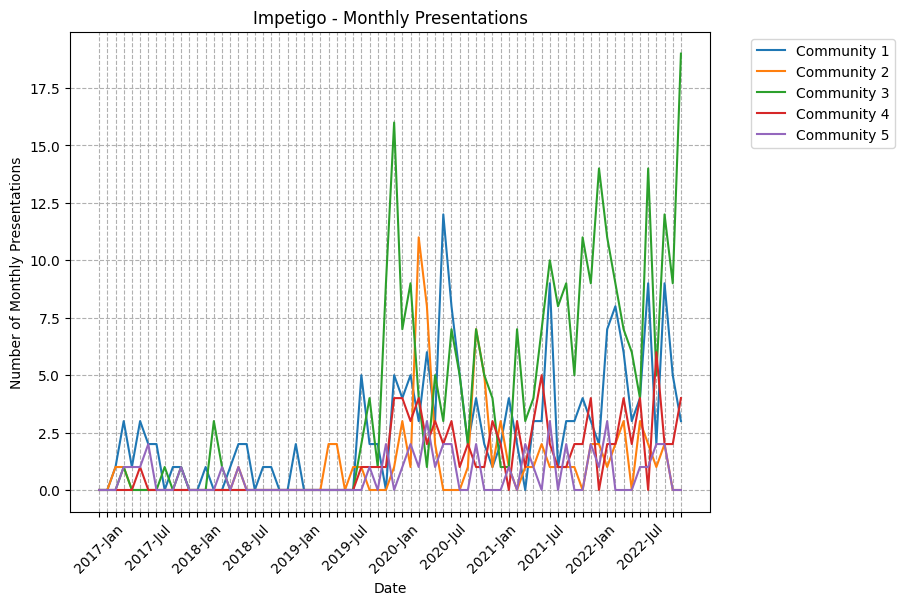

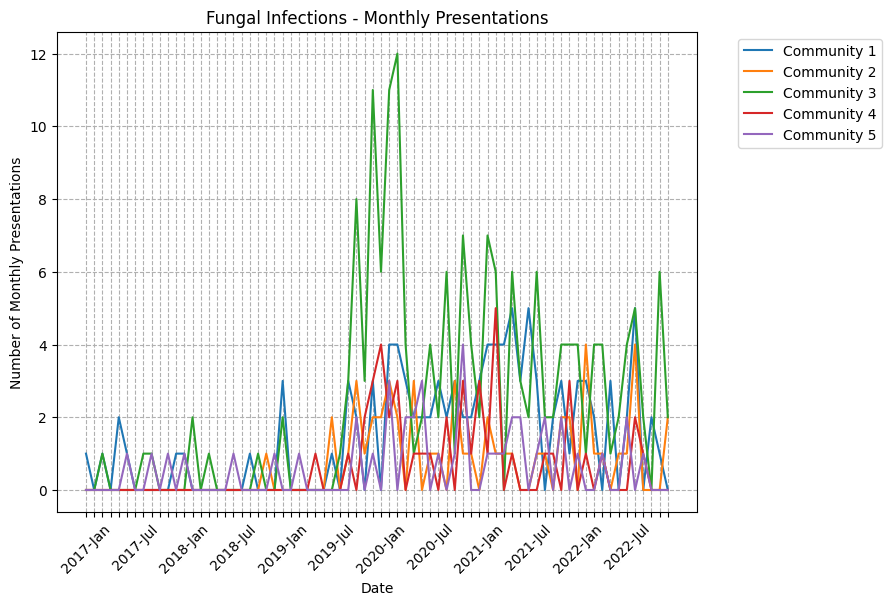

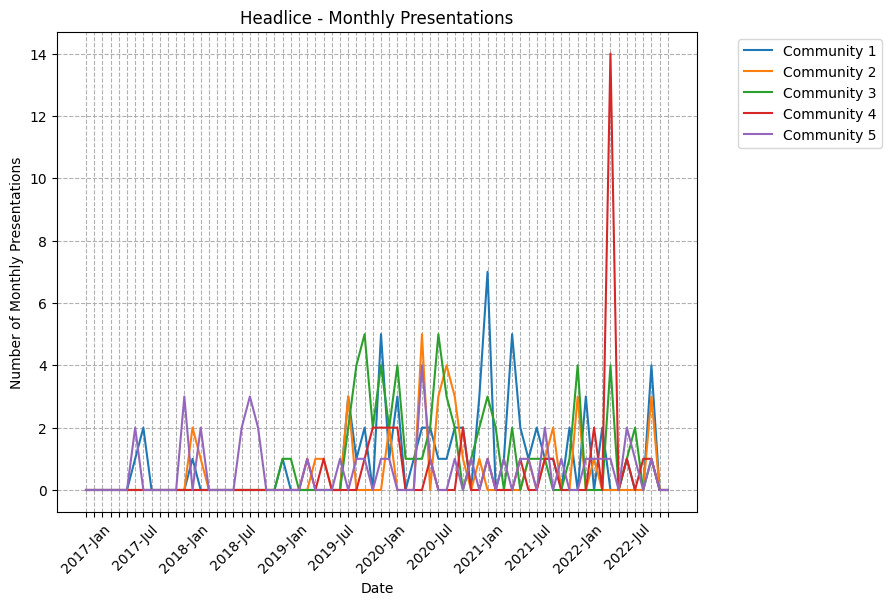

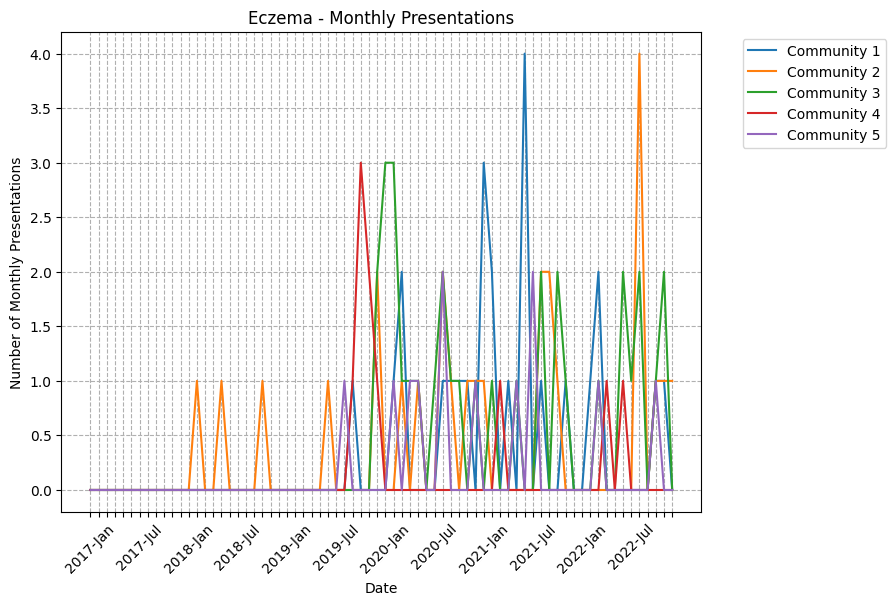

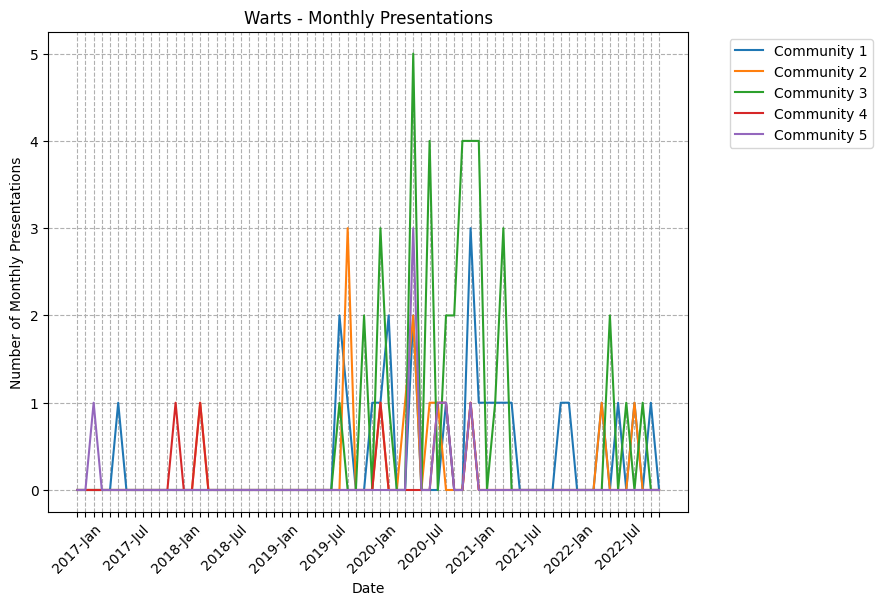

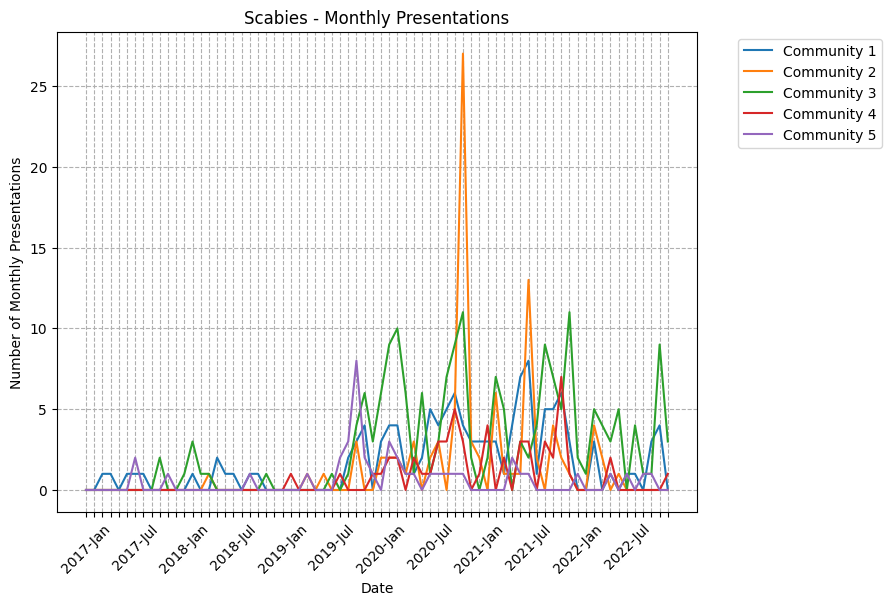

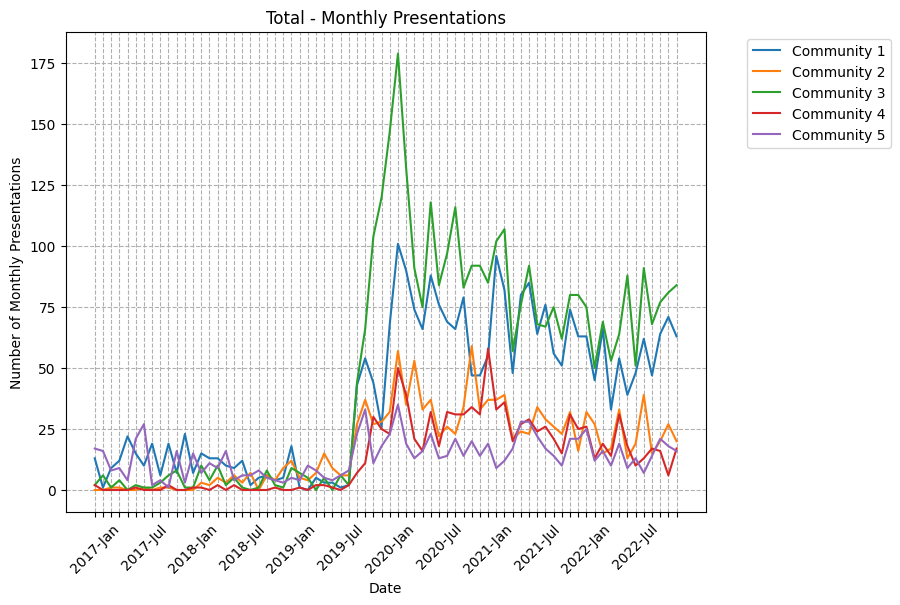

In [8]:
#PLOT BY String Search Category
for b in range (0, len(Plot_array[0])):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    for a in range (0, len(Plot_array)):
        ax.plot(Headings[1:-3], Plot_array[a][b][1:-3], label= "Community {}".format(a + 1))

    #Show every 6 months
    temp = ax.xaxis.get_ticklabels()
    temp = list(set(temp) - set(temp[::6]))
    for label in temp:
        label.set_visible(False)

    plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
    plt.grid(True, linestyle="dashed")
    plt.legend(bbox_to_anchor=(1.3,1), loc="upper right")
    
    plt.title("{} - Monthly Presentations".format(Plot_array[a][b][0]))
    plt.ylabel("Number of Monthly Presentations")
    plt.xlabel("Date")
    plt.savefig('{}.png'.format(Plot_array[a][b][0]),dpi=300, bbox_inches = "tight")
    plt.show()

## Cluster Level

In [9]:
#Cluster 1 - Community 3
#Cluster 2 - Community 1, 4 and 5

Months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

#PrinT Results to CSV and save to an array for plotting
Plot_array = []
for community_number in range (0, len(data)):
    
    temp_plotarray = []
    Group_Total = {}
    for key in Category_dictionary:
        Group_Total[key] = [0]*75
    Group_Total["Total"] = [0]*75 #An entry for the total number of skin related primary presentations.

    for a in range (0, len(data[community_number])):
        group = group_dict[data[community_number][a][0]]
        date = data[community_number][a][2]
        year = int(date.split("-")[0])
        month = int(date.split("-")[1]) - 1
        column = (year - 2017) * 12 + month

        #Add to the total of group_total
        if  column < 75:
            Group_Total[group][column] = Group_Total[group][column] + 1
            #if column == 0:
                #print(group, date, column)
                
    #Find total
    for key in Group_Total:
        if key != "Skin" and key != "Total":
            for a in range (0, len(Group_Total[key])):
                Group_Total["Total"][a] = Group_Total["Total"][a] + Group_Total[key][a]
                
    #Header
    Headings = ["Community {}".format(community_number + 1)]
    for a in range (0, 75):
        #print(a, 2017 + int(a / 12), Months[a % 12])
        temp_string = "{}-{}".format(2017 + int(a / 12), Months[a % 12])
        Headings.append(temp_string)

    temp = []
    for key in Group_Total:
        if key != "Skin":
            Group_Total[key].insert(0, key)
            #print(community_number, key)
            temp_plotarray.append(Group_Total[key])
            temp.append(Group_Total[key])
    Plot_array.append(temp)

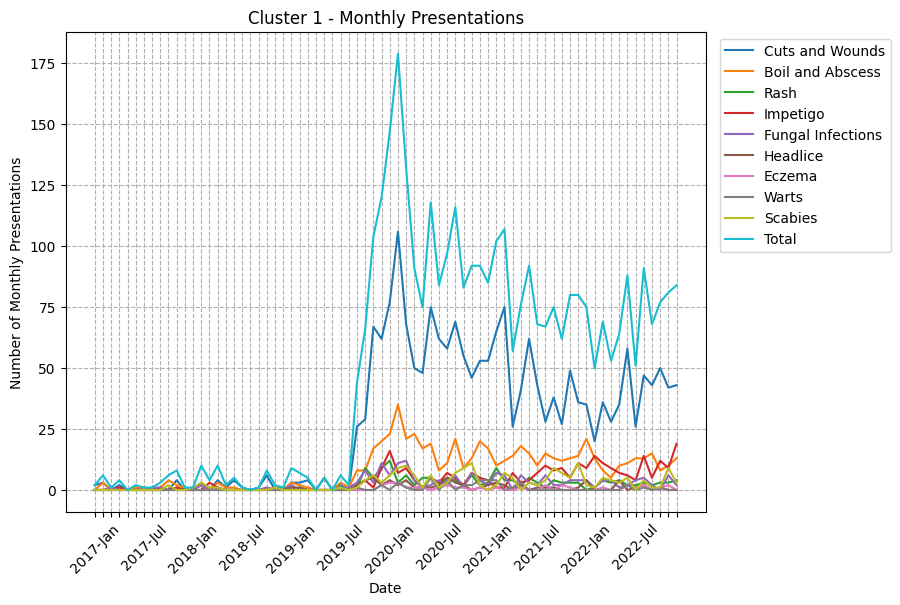

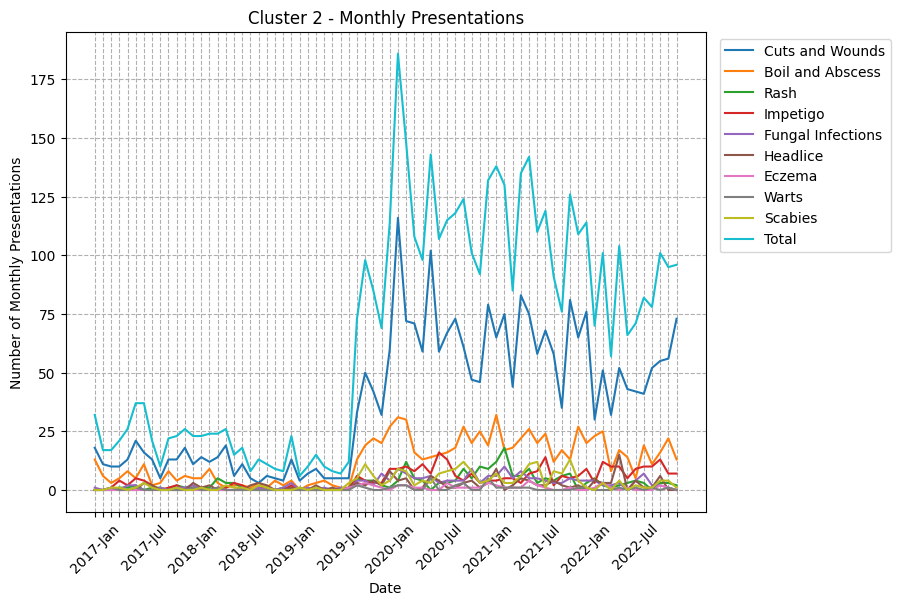

In [10]:
#Cluster 1 - Community 3
#Cluster 2 - Community 1, 4 and 5

#PLOT BY COMMUNITY
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

for b in range (0, len(Plot_array[2])):
    ax.plot(Headings[1:-3], Plot_array[2][b][1:-3], label=Plot_array[2][b][0])

#Show every 6 months
temp = ax.xaxis.get_ticklabels()
temp = list(set(temp) - set(temp[::6]))
for label in temp:
    label.set_visible(False)

plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.grid(True, linestyle="dashed")
plt.legend(bbox_to_anchor=(1.3,1), loc="upper right")

plt.title("Cluster 1 - Monthly Presentations")
plt.ylabel("Number of Monthly Presentations")
plt.xlabel("Date")
plt.savefig('Cluster 1.png'.format(a + 1),dpi=300, bbox_inches = "tight")

plt.show()

Cluster_2 = Plot_array[0].copy()
    
#Add the additional Communities
for a in range (0, len(Plot_array[3])):
    for b in range (1, len(Plot_array[3][a])): #Don't Inlude the headings
        Cluster_2[a][b] = Cluster_2[a][b] + Plot_array[3][a][b]
        
for a in range (0, len(Plot_array[4])):
    for b in range (1, len(Plot_array[4][a])): #Don't Inlude the headings
        Cluster_2[a][b] = Cluster_2[a][b] + Plot_array[4][a][b]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

for b in range (0, len(Cluster_2)):
    ax.plot(Headings[1:-3], Cluster_2[b][1:-3], label=Cluster_2[b][0])

#Show every 6 months
temp = ax.xaxis.get_ticklabels()
temp = list(set(temp) - set(temp[::6]))
for label in temp:
    label.set_visible(False)

plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.grid(True, linestyle="dashed")
plt.legend(bbox_to_anchor=(1.3,1), loc="upper right")

plt.title("Cluster 2 - Monthly Presentations")
plt.ylabel("Number of Monthly Presentations")
plt.xlabel("Date")
plt.savefig('Cluster 2.png'.format(a + 1),dpi=300, bbox_inches = "tight")

plt.show()

### Only Scabies / Impetigo

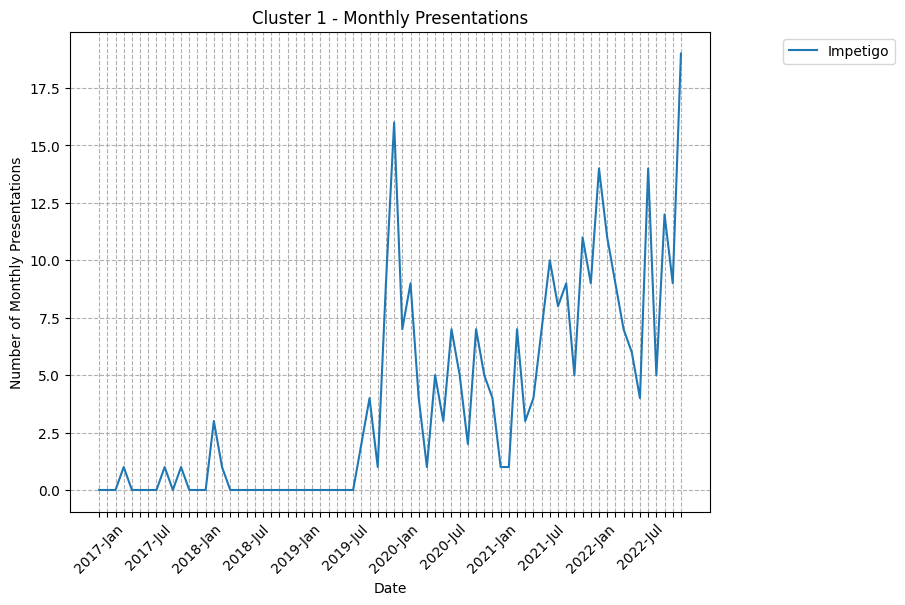

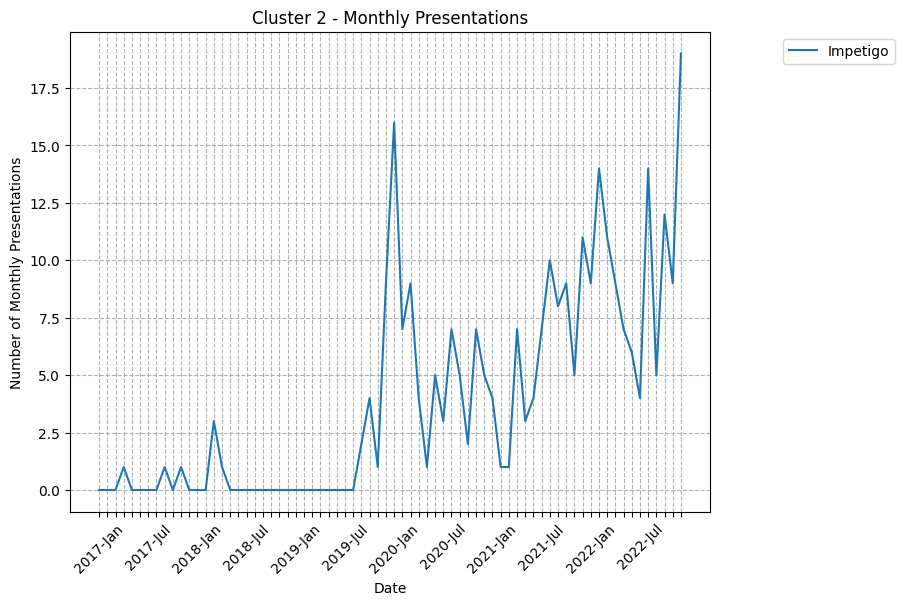

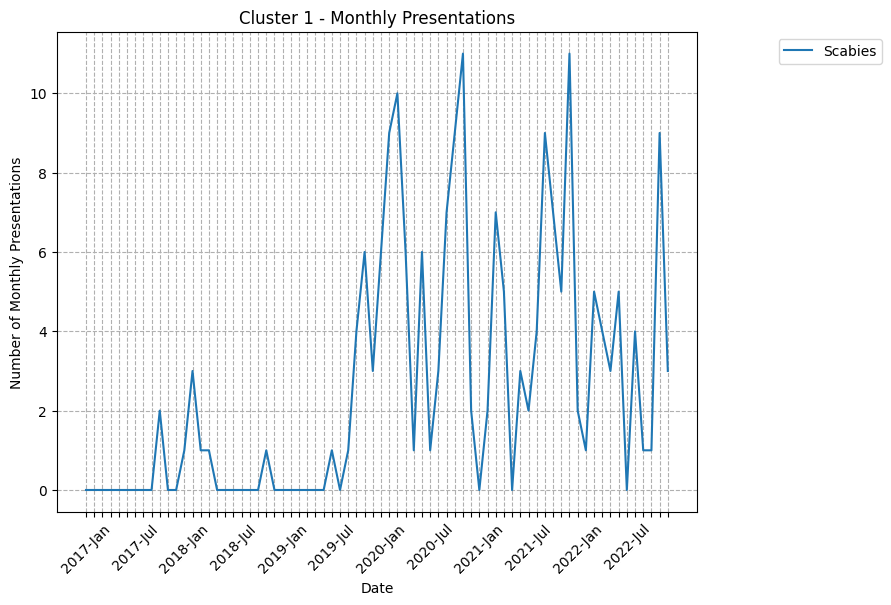

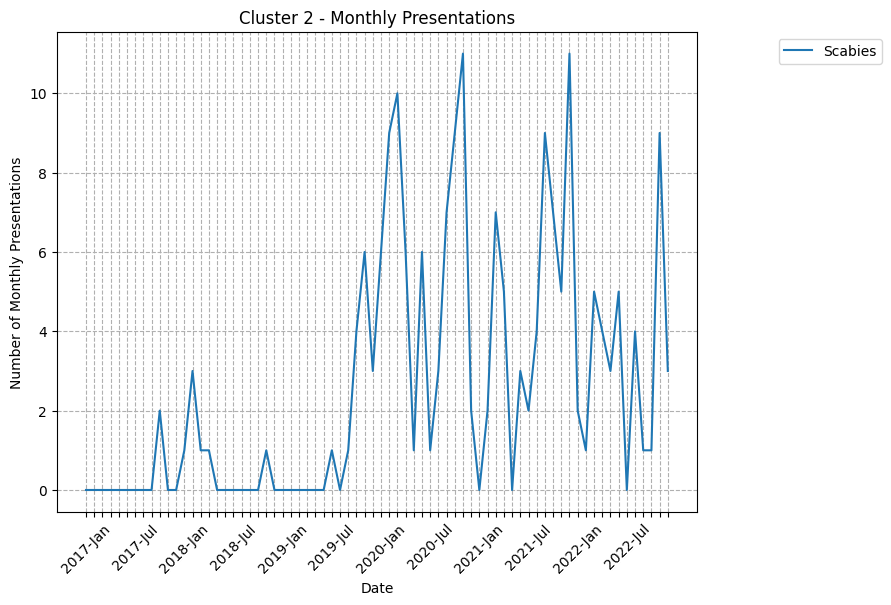

In [11]:
#IMPETIGO
#Cluster 1 - Community 3
#Cluster 2 - Community 1, 4 and 5

#PLOT BY COMMUNITY
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(Headings[1:-3], Plot_array[2][3][1:-3], label=Plot_array[2][3][0])

#Show every 6 months
temp = ax.xaxis.get_ticklabels()
temp = list(set(temp) - set(temp[::6]))
for label in temp:
    label.set_visible(False)

plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.grid(True, linestyle="dashed")
plt.legend(bbox_to_anchor=(1.3,1), loc="upper right")

plt.title("Cluster 1 - Monthly Presentations")
plt.ylabel("Number of Monthly Presentations")
plt.xlabel("Date")
plt.savefig('Cluster 1 Impetigo.png'.format(a + 1),dpi=300, bbox_inches = "tight")

plt.show()

Cluster_2 = Plot_array[0].copy()
    
#Add the additional Communities
for a in range (0, len(Plot_array[3])):
    for b in range (1, len(Plot_array[3][a])): #Don't Inlude the headings
        Cluster_2[a][b] = Cluster_2[a][b] + Plot_array[3][a][b]
        
for a in range (0, len(Plot_array[4])):
    for b in range (1, len(Plot_array[4][a])): #Don't Inlude the headings
        Cluster_2[a][b] = Cluster_2[a][b] + Plot_array[4][a][b]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(Headings[1:-3], Plot_array[2][3][1:-3], label=Plot_array[2][3][0])

#Show every 6 months
temp = ax.xaxis.get_ticklabels()
temp = list(set(temp) - set(temp[::6]))
for label in temp:
    label.set_visible(False)

plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.grid(True, linestyle="dashed")
plt.legend(bbox_to_anchor=(1.3,1), loc="upper right")

plt.title("Cluster 2 - Monthly Presentations")
plt.ylabel("Number of Monthly Presentations")
plt.xlabel("Date")
plt.savefig('Cluster 2 Scabies.png'.format(a + 1),dpi=300, bbox_inches = "tight")

plt.show()

#SCABIES
#Cluster 1 - Community 3
#Cluster 2 - Community 1, 4 and 5

#PLOT BY COMMUNITY
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(Headings[1:-3], Plot_array[2][8][1:-3], label=Plot_array[2][8][0])

#Show every 6 months
temp = ax.xaxis.get_ticklabels()
temp = list(set(temp) - set(temp[::6]))
for label in temp:
    label.set_visible(False)

plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.grid(True, linestyle="dashed")
plt.legend(bbox_to_anchor=(1.3,1), loc="upper right")

plt.title("Cluster 1 - Monthly Presentations")
plt.ylabel("Number of Monthly Presentations")
plt.xlabel("Date")
plt.savefig('Cluster 1 Impetigo.png'.format(a + 1),dpi=300, bbox_inches = "tight")

plt.show()

Cluster_2 = Plot_array[0].copy()
    
#Add the additional Communities
for a in range (0, len(Plot_array[3])):
    for b in range (1, len(Plot_array[3][a])): #Don't Inlude the headings
        Cluster_2[a][b] = Cluster_2[a][b] + Plot_array[3][a][b]
        
for a in range (0, len(Plot_array[4])):
    for b in range (1, len(Plot_array[4][a])): #Don't Inlude the headings
        Cluster_2[a][b] = Cluster_2[a][b] + Plot_array[4][a][b]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(Headings[1:-3], Plot_array[2][8][1:-3], label=Plot_array[2][8][0])

#Show every 6 months
temp = ax.xaxis.get_ticklabels()
temp = list(set(temp) - set(temp[::6]))
for label in temp:
    label.set_visible(False)

plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.grid(True, linestyle="dashed")
plt.legend(bbox_to_anchor=(1.3,1), loc="upper right")

plt.title("Cluster 2 - Monthly Presentations")
plt.ylabel("Number of Monthly Presentations")
plt.xlabel("Date")
plt.savefig('Cluster 2 Scabies.png'.format(a + 1),dpi=300, bbox_inches = "tight")

plt.show()

# SToP clinic data Analysis - Medications

In [12]:
Months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

Category_dictionary["Impetigo"] = ["sores", "impetigo", "pyoderma", "school sores", "purulent", "crusted"]
Category_dictionary["Scabies"] = ["scabies", "scabetic", "secondarily infected scabies", "impetiginous scabies"]

#PrinT Results to CSV and save to an array for plotting
Plot_array = []
for community_number in range (0, len(data_med)):
    
    Impetigo_Benz = [0] * 75
    Impetigo_Trim = [0] * 75
    Scabies_Perm = [0] * 75
    Scabies_Iver = [0] * 75
    
    for a in range (0, len(data_med[community_number])):
        group = group_dict[data_med[community_number][a][2]]
        date = data_med[community_number][a][1]
        medication = data_med[community_number][a][3]
        year = int(date.split("-")[0])
        month = int(date.split("-")[1]) - 1
        column = (year - 2017) * 12 + month
        
        if group == "Impetigo" and column < 75: #Column < 75 removes any records that occur in 2023
            if medication == "['benzathine', 'benzylpenicillin', 'tetrahydrate']":
                Impetigo_Benz[column] = Impetigo_Benz[column] + 1
            if medication == "['trimethoprim', 'sulfamethoxazole']":
                Impetigo_Trim[column] = Impetigo_Trim[column] + 1
            
        if group == "Scabies" and column < 75:
            if medication == "['permethrin']":
                Scabies_Perm[column] = Scabies_Perm[column] + 1
            if medication == "['ivermectin']":
                Scabies_Iver[column] = Scabies_Iver[column] + 1
                
    temp_community_array = [Impetigo_Benz, Impetigo_Trim, Scabies_Perm, Scabies_Iver]
    Plot_array.append(temp_community_array)

#Header
Headings = []
for a in range (0, 75):
    #print(a, 2017 + int(a / 12), Months[a % 12])
    temp_string = "{}-{}".format(2017 + int(a / 12), Months[a % 12])
    Headings.append(temp_string)

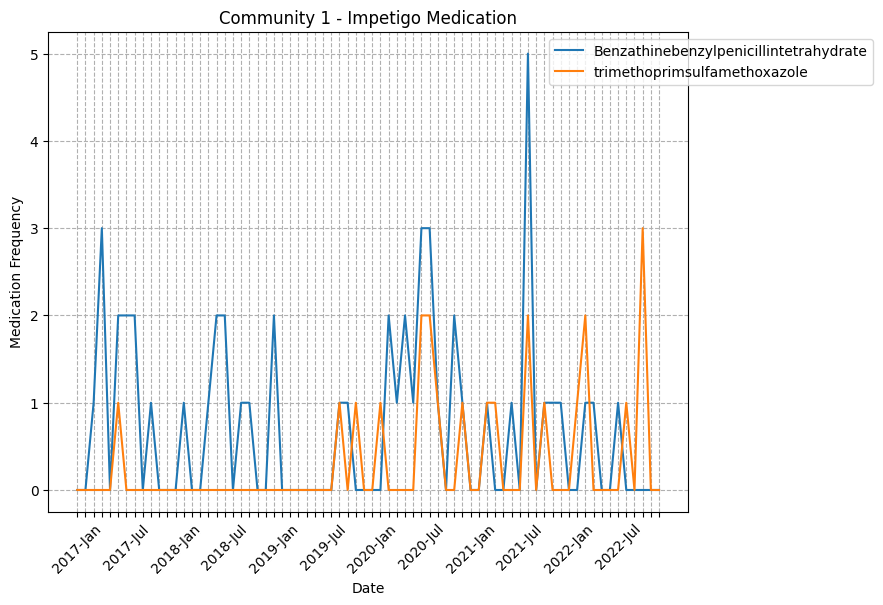

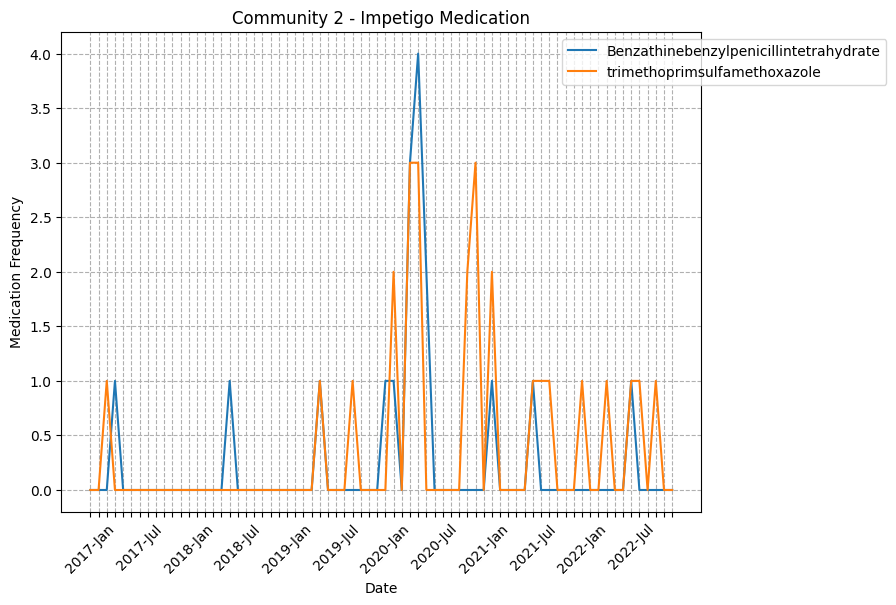

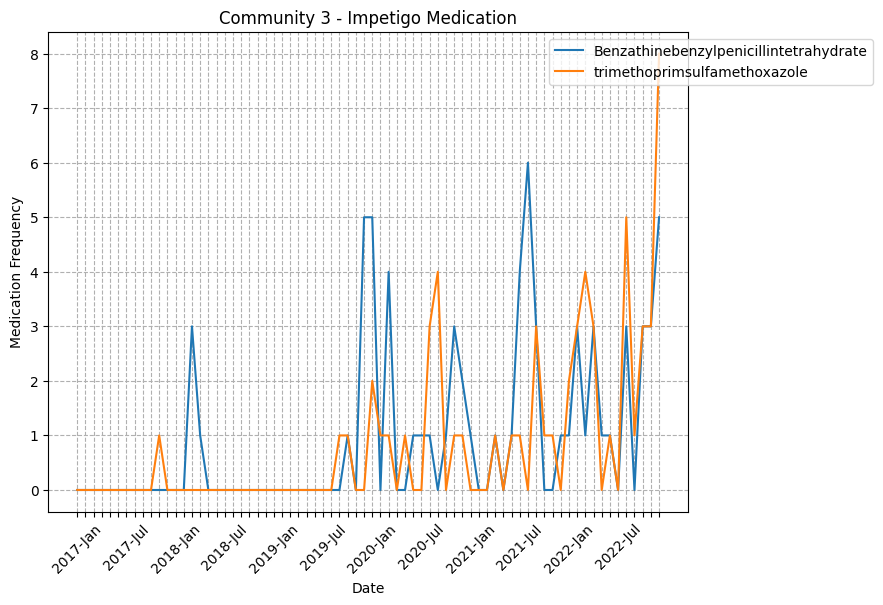

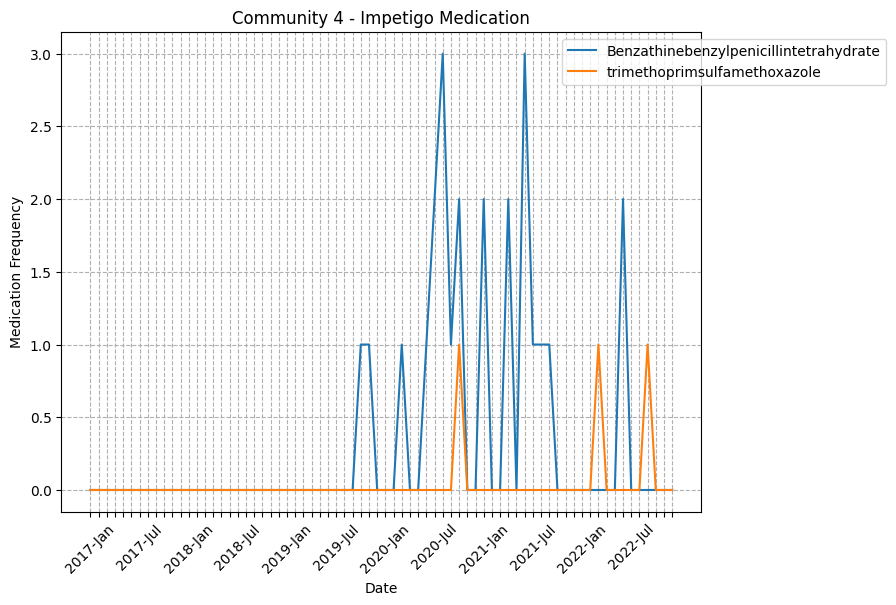

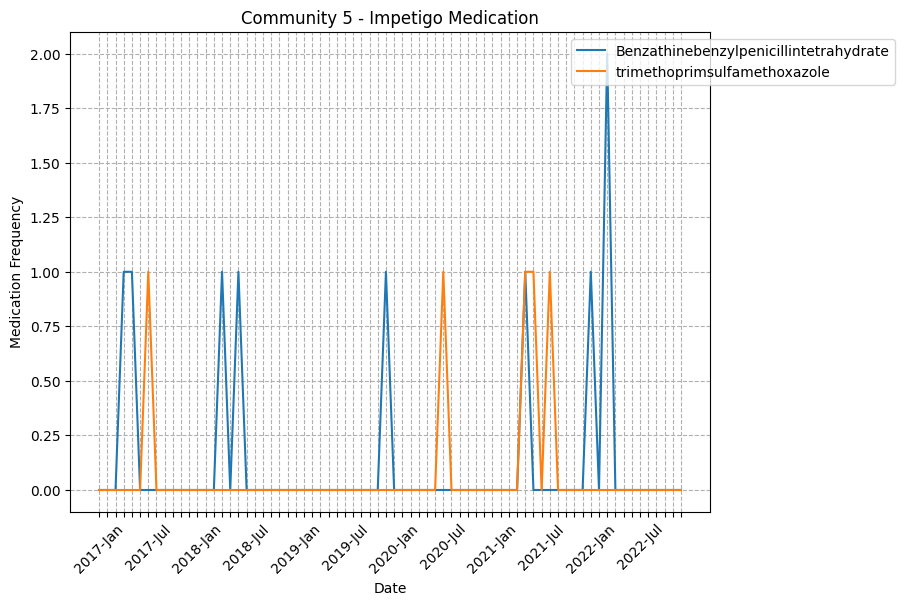

In [13]:
#PLOT BY COMMUNITY (Impetigo)
label_array = ["Benzathinebenzylpenicillintetrahydrate", "trimethoprimsulfamethoxazole" ]

for a in range (0, len(Plot_array)):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    for b in range (0, 2):
        ax.plot(Headings[0:-3], Plot_array[a][b][0:-3], label=label_array[b])

    #Show every 6 months
    temp = ax.xaxis.get_ticklabels()
    temp = list(set(temp) - set(temp[::6]))
    for label in temp:
        label.set_visible(False)

    plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
    plt.grid(True, linestyle="dashed")
    plt.legend(bbox_to_anchor=(1.3,1), loc="upper right")
    
    plt.title("Community {} - Impetigo Medication".format(a + 1))
    plt.ylabel("Medication Frequency")
    plt.xlabel("Date")
    plt.savefig('Community {}.png'.format(a + 1),dpi=300, bbox_inches = "tight")
    
    plt.show()

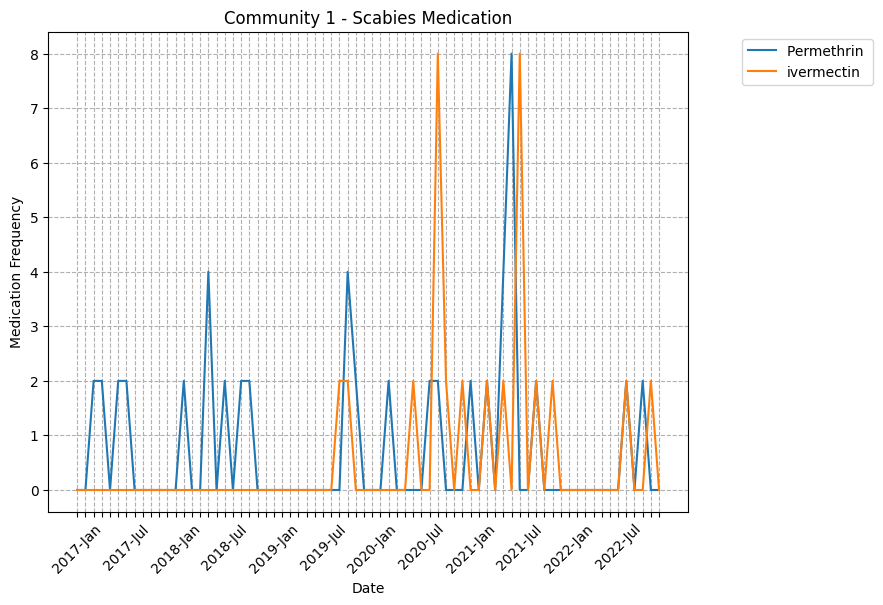

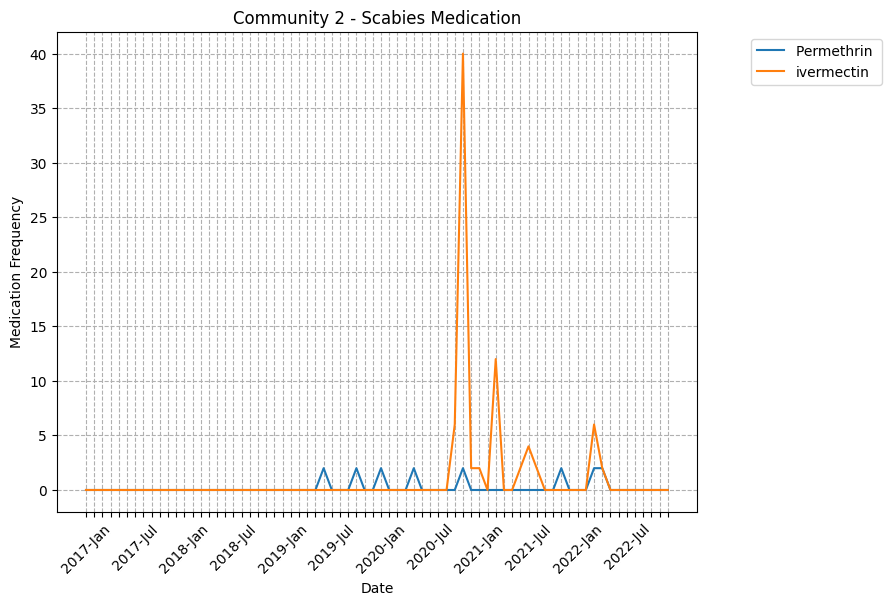

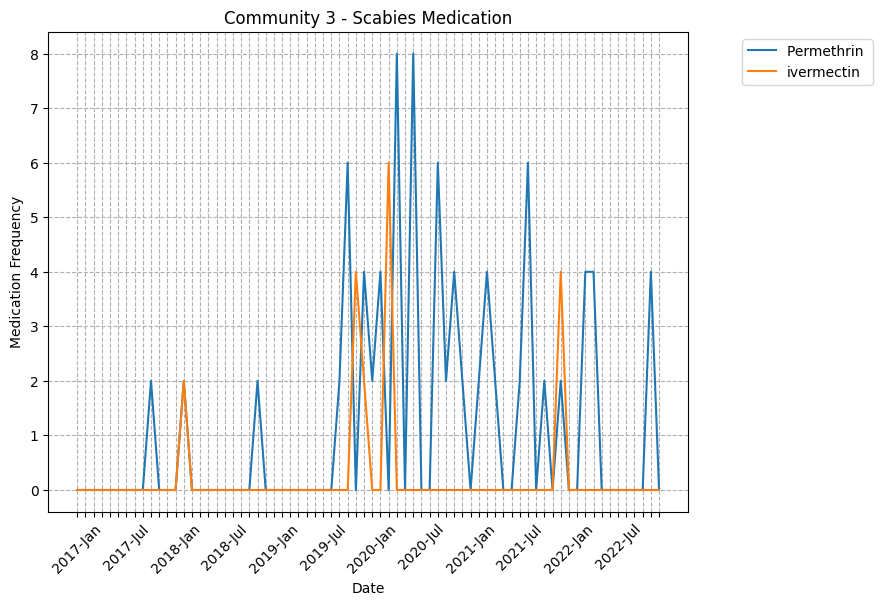

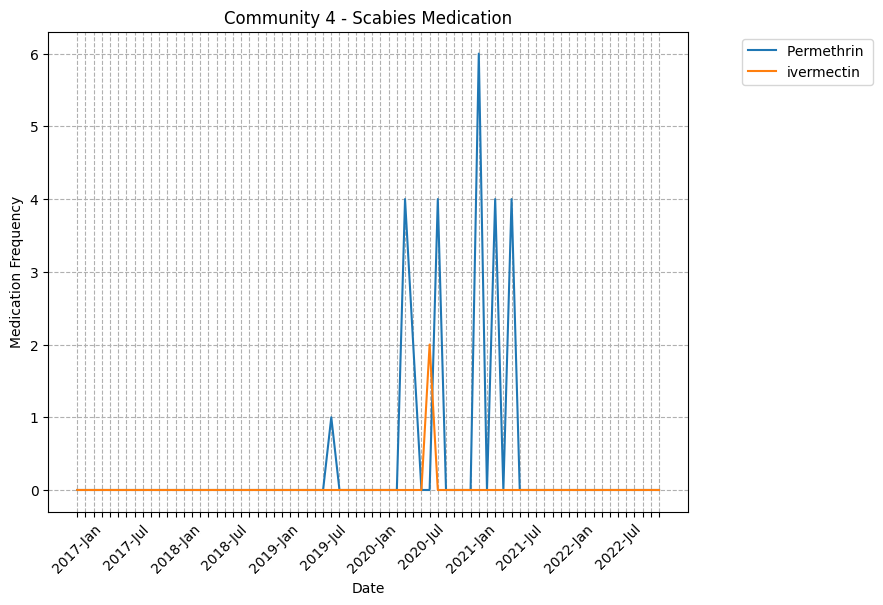

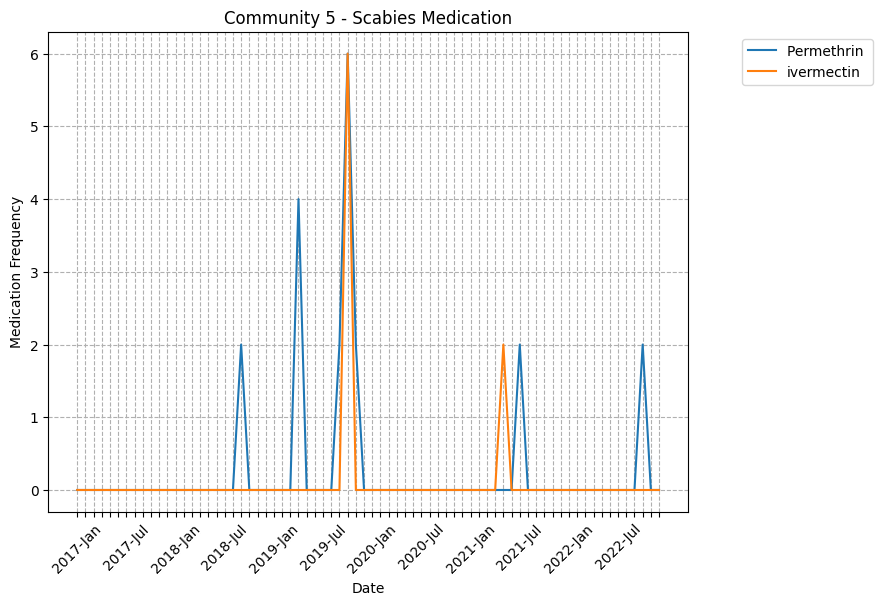

In [14]:
#PLOT BY COMMUNITY (Scabies)

label_array = ["Permethrin ", "ivermectin" ]

for a in range (0, len(Plot_array)):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    for b in range (2, 4):
        ax.plot(Headings[0:-3], Plot_array[a][b][0:-3], label=label_array[b-2])

    #Show every 6 months
    temp = ax.xaxis.get_ticklabels()
    temp = list(set(temp) - set(temp[::6]))
    for label in temp:
        label.set_visible(False)

    plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
    plt.grid(True, linestyle="dashed")
    plt.legend(bbox_to_anchor=(1.3,1), loc="upper right")
    
    plt.title("Community {} - Scabies Medication".format(a + 1))
    plt.ylabel("Medication Frequency")
    plt.xlabel("Date")
    plt.savefig('Community {}.png'.format(a + 1),dpi=300, bbox_inches = "tight")
    
    plt.show()

## Cluster Level

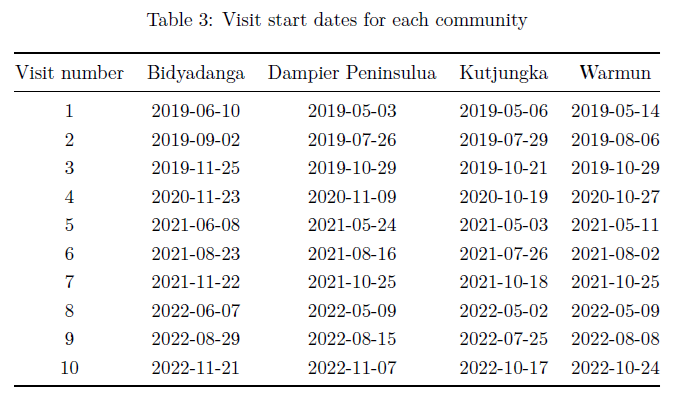

In [25]:
datetime.date(2019,6,10)

#Cluster 1 (Bidyadanga) - Community 3
cluster_1_dates = [datetime.date(2019,6,10), datetime.date(2019,9,2), datetime.date(2019,11,25), datetime.date(2020,11,23), datetime.date(2021,6,8), datetime.date(2021,8,23), datetime.date(2021,11,22), datetime.date(2022,6,7), datetime.date(2022,8,29), datetime.date(2022,11,21), datetime.date(2023,1,1)]
#Cluster 2 (Kutjunka) - Community 1, 4 and 5
cluster_2_dates = [datetime.date(2019,5,6), datetime.date(2019,7,29), datetime.date(2019,10,21,), datetime.date(2020,10,19), datetime.date(2021,5,3), datetime.date(2021,7,26), datetime.date(2021,10,18), datetime.date(2022,5,2), datetime.date(2022,7,25), datetime.date(2022,10,17), datetime.date(2023,1,1)]
#Cluster 3 (Dampia Peninsulua) - Community 2
cluster_3_dates = [datetime.date(2019,5,3), datetime.date(2019,7,26), datetime.date(2019,10,29), datetime.date(2020,11,9), datetime.date(2021,5,24), datetime.date(2021,8,16), datetime.date(2021,10,25), datetime.date(2022,5,9), datetime.date(2022,8,15), datetime.date(2022,11,7), datetime.date(2023,1,1)]

In [51]:
#Cluster 1 (Bidyadanga) - Community 3
#Cluster 2 (Kutjunka) - Community 1, 4 and 5
#Cluster 3 (Dampia Peninsulua) - Community 2

### Cluster 1 (Bidyadanga) - Community 3

In [83]:
Category_dictionary["Impetigo"] = ["sores", "impetigo", "pyoderma", "school sores", "purulent", "crusted"]
Category_dictionary["Scabies"] = ["scabies", "scabetic", "secondarily infected scabies", "impetiginous scabies"]

Cluster1 = []
#PrinT Results to CSV and save to an array for plotting
Plot_array = []
community_number = 2 #(Bidyadanga)
    
Impetigo_Benz = [0]*10
Impetigo_Trim = [0]*10
Scabies_Perm = [0]*10
Scabies_Iver = [0]*10

#Find the number of days between each visit:
num_week_array = []

for a in range (1, len(cluster_1_dates)):
    date_diff = cluster_1_dates[a] - cluster_1_dates[a-1]
    num_week_array.append(date_diff.days/7)

for a in range (0, len(data_med[community_number])):
    group = group_dict[data_med[community_number][a][2]]
    date = data_med[community_number][a][1] #convert into datetime
    medication = data_med[community_number][a][3]

    year = int(date.split("-")[0])
    month = int(date.split("-")[1])
    day = int(date.split("-")[2])
    temp_date = datetime.date(year,month,day)
    
    count = 0
    for b in range (0, len(cluster_1_dates)):
        if (temp_date - cluster_1_dates[b]) > datetime.timedelta(0):
            count = count + 1

    if count < 11 and count != 0: #Remove the counts that happen after the end of 2022 or before the first visit
        #print(count - 1, cluster_1_dates[count - 1], temp_date)
        if group == "Impetigo":
            if medication == "['benzathine', 'benzylpenicillin', 'tetrahydrate']":
                Impetigo_Benz[count-1] = Impetigo_Benz[count-1] + 1
            if medication == "['trimethoprim', 'sulfamethoxazole']":
                Impetigo_Trim[count-1] = Impetigo_Trim[count-1] + 1

        if group == "Scabies":
            if medication == "['permethrin']":
                Scabies_Perm[count-1] = Scabies_Perm[count-1] + 1
            if medication == "['ivermectin']":
                Scabies_Iver[count-1] = Scabies_Iver[count-1] + 1

#Convert count into "per week"
for a in range (0, len(num_week_array)):
    Impetigo_Benz[a] = Impetigo_Benz[a] / num_week_array[a]
    Impetigo_Trim[a] = Impetigo_Trim[a] / num_week_array[a]
    Scabies_Perm[a] = Scabies_Perm[a] / num_week_array[a]
    Scabies_Iver[a] = Scabies_Iver[a] / num_week_array[a]

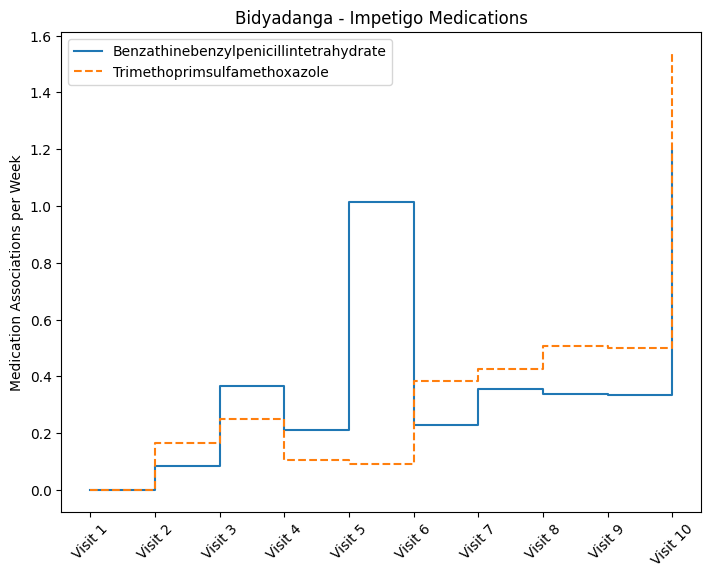

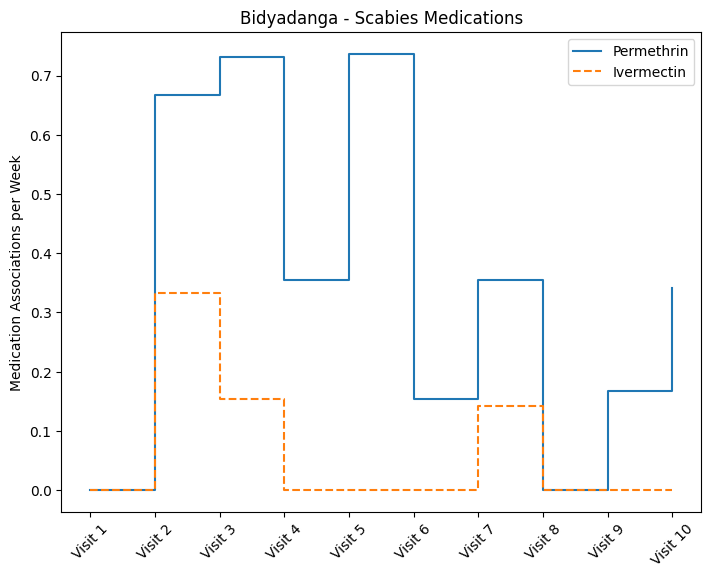

In [84]:
#Step chart
import matplotlib.pyplot as plt

headings = []
for a in range (1, 11):
    headings.append("Visit {}".format(a))

#label_array = ["Benzathinebenzylpenicillintetrahydrate", "Trimethoprimsulfamethoxazole" ]
#label_array = ["Permethrin ", "Ivermectin" ]


#IMPETIGO
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.step(headings, Impetigo_Benz, where='post', label = "Benzathinebenzylpenicillintetrahydrate")
ax.step(headings, Impetigo_Trim, where='post', linestyle='dashed', label = "Trimethoprimsulfamethoxazole")

plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
# plt.grid(True, linestyle="dashed")
plt.legend()

plt.title("Bidyadanga - Impetigo Medications")
plt.ylabel("Medication Associations per Week")
# plt.xlabel("Date")
plt.savefig('Bidyadanga - Impetigo Medications.png',dpi=300, bbox_inches = "tight")

plt.show()

#SCABIES
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.step(headings, Scabies_Perm, where='post', label = "Permethrin")
ax.step(headings, Scabies_Iver, where='post', linestyle='dashed', label = "Ivermectin")

plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
# plt.grid(True, linestyle="dashed")
plt.legend()

plt.title("Bidyadanga - Scabies Medications")
plt.ylabel("Medication Associations per Week")
# plt.xlabel("Date")
plt.savefig('Bidyadanga - Scabies Medications.png',dpi=300, bbox_inches = "tight")

plt.show()

### Cluster 2 (Kutjunka) - Community 1, 4 and 5

In [85]:
Category_dictionary["Impetigo"] = ["sores", "impetigo", "pyoderma", "school sores", "purulent", "crusted"]
Category_dictionary["Scabies"] = ["scabies", "scabetic", "secondarily infected scabies", "impetiginous scabies"]

Cluster1 = []
#PrinT Results to CSV and save to an array for plotting
Plot_array = []
    
Impetigo_Benz = [0]*10
Impetigo_Trim = [0]*10
Scabies_Perm = [0]*10
Scabies_Iver = [0]*10

#Find the number of days between each visit:
num_week_array = []

for a in range (1, len(cluster_1_dates)):
    date_diff = cluster_1_dates[a] - cluster_1_dates[a-1]
    num_week_array.append(date_diff.days/7)

#COMMUNITY 1
community_number = 0
for a in range (0, len(data_med[community_number])):
    group = group_dict[data_med[community_number][a][2]]
    date = data_med[community_number][a][1] #convert into datetime
    medication = data_med[community_number][a][3]

    year = int(date.split("-")[0])
    month = int(date.split("-")[1])
    day = int(date.split("-")[2])
    temp_date = datetime.date(year,month,day)
    
    count = 0
    for b in range (0, len(cluster_1_dates)):
        if (temp_date - cluster_1_dates[b]) > datetime.timedelta(0):
            count = count + 1

    if count < 11 and count != 0: #Remove the counts that happen after the end of 2022 or before the first visit
        #print(count - 1, cluster_1_dates[count - 1], temp_date)
        if group == "Impetigo":
            if medication == "['benzathine', 'benzylpenicillin', 'tetrahydrate']":
                Impetigo_Benz[count-1] = Impetigo_Benz[count-1] + 1
            if medication == "['trimethoprim', 'sulfamethoxazole']":
                Impetigo_Trim[count-1] = Impetigo_Trim[count-1] + 1

        if group == "Scabies":
            if medication == "['permethrin']":
                Scabies_Perm[count-1] = Scabies_Perm[count-1] + 1
            if medication == "['ivermectin']":
                Scabies_Iver[count-1] = Scabies_Iver[count-1] + 1
                
#COMMUNITY 4
community_number = 3
for a in range (0, len(data_med[community_number])):
    group = group_dict[data_med[community_number][a][2]]
    date = data_med[community_number][a][1] #convert into datetime
    medication = data_med[community_number][a][3]

    year = int(date.split("-")[0])
    month = int(date.split("-")[1])
    day = int(date.split("-")[2])
    temp_date = datetime.date(year,month,day)
    
    count = 0
    for b in range (0, len(cluster_1_dates)):
        if (temp_date - cluster_1_dates[b]) > datetime.timedelta(0):
            count = count + 1

    if count < 11 and count != 0: #Remove the counts that happen after the end of 2022 or before the first visit
        #print(count - 1, cluster_1_dates[count - 1], temp_date)
        if group == "Impetigo":
            if medication == "['benzathine', 'benzylpenicillin', 'tetrahydrate']":
                Impetigo_Benz[count-1] = Impetigo_Benz[count-1] + 1
            if medication == "['trimethoprim', 'sulfamethoxazole']":
                Impetigo_Trim[count-1] = Impetigo_Trim[count-1] + 1

        if group == "Scabies":
            if medication == "['permethrin']":
                Scabies_Perm[count-1] = Scabies_Perm[count-1] + 1
            if medication == "['ivermectin']":
                Scabies_Iver[count-1] = Scabies_Iver[count-1] + 1
                
#COMMUNITY 4
community_number = 4
for a in range (0, len(data_med[community_number])):
    group = group_dict[data_med[community_number][a][2]]
    date = data_med[community_number][a][1] #convert into datetime
    medication = data_med[community_number][a][3]

    year = int(date.split("-")[0])
    month = int(date.split("-")[1])
    day = int(date.split("-")[2])
    temp_date = datetime.date(year,month,day)
    
    count = 0
    for b in range (0, len(cluster_1_dates)):
        if (temp_date - cluster_1_dates[b]) > datetime.timedelta(0):
            count = count + 1

    if count < 11 and count != 0: #Remove the counts that happen after the end of 2022 or before the first visit
        #print(count - 1, cluster_1_dates[count - 1], temp_date)
        if group == "Impetigo":
            if medication == "['benzathine', 'benzylpenicillin', 'tetrahydrate']":
                Impetigo_Benz[count-1] = Impetigo_Benz[count-1] + 1
            if medication == "['trimethoprim', 'sulfamethoxazole']":
                Impetigo_Trim[count-1] = Impetigo_Trim[count-1] + 1

        if group == "Scabies":
            if medication == "['permethrin']":
                Scabies_Perm[count-1] = Scabies_Perm[count-1] + 1
            if medication == "['ivermectin']":
                Scabies_Iver[count-1] = Scabies_Iver[count-1] + 1

#Convert count into "per week"
for a in range (0, len(num_week_array)):
    Impetigo_Benz[a] = Impetigo_Benz[a] / num_week_array[a]
    Impetigo_Trim[a] = Impetigo_Trim[a] / num_week_array[a]
    Scabies_Perm[a] = Scabies_Perm[a] / num_week_array[a]
    Scabies_Iver[a] = Scabies_Iver[a] / num_week_array[a]

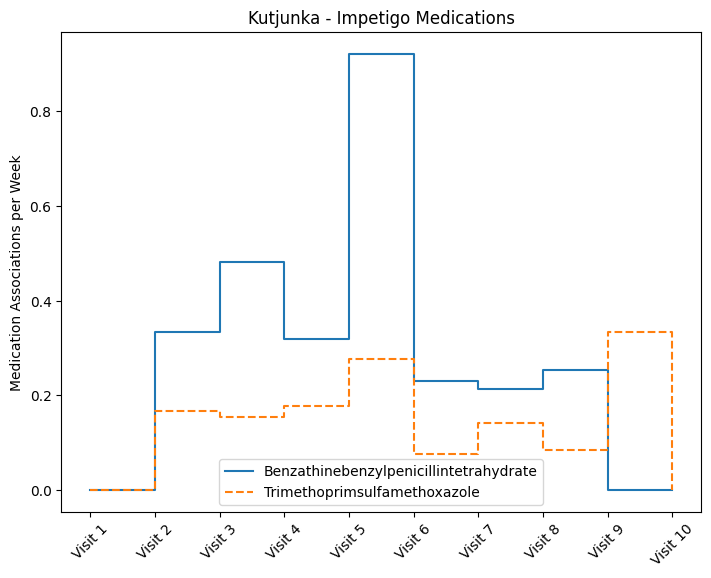

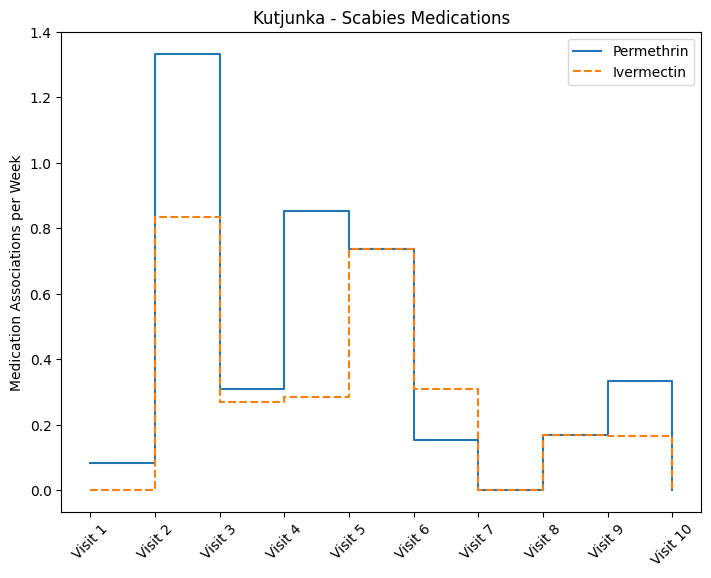

In [86]:
#Step chart
import matplotlib.pyplot as plt

headings = []
for a in range (1, 11):
    headings.append("Visit {}".format(a))

#label_array = ["Benzathinebenzylpenicillintetrahydrate", "Trimethoprimsulfamethoxazole" ]
#label_array = ["Permethrin ", "Ivermectin" ]


#IMPETIGO
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.step(headings, Impetigo_Benz, where='post', label = "Benzathinebenzylpenicillintetrahydrate")
ax.step(headings, Impetigo_Trim, where='post', linestyle='dashed', label = "Trimethoprimsulfamethoxazole")

plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
# plt.grid(True, linestyle="dashed")
plt.legend()

plt.title("Kutjunka - Impetigo Medications")
plt.ylabel("Medication Associations per Week")
# plt.xlabel("Date")
plt.savefig('Kutjunka - Impetigo Medications',dpi=300, bbox_inches = "tight")

plt.show()

#SCABIES
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.step(headings, Scabies_Perm, where='post', label = "Permethrin")
ax.step(headings, Scabies_Iver, where='post', linestyle='dashed', label = "Ivermectin")

plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
# plt.grid(True, linestyle="dashed")
plt.legend()

plt.title("Kutjunka - Scabies Medications")
plt.ylabel("Medication Associations per Week")
# plt.xlabel("Date")
plt.savefig('Kutjunka - Scabies Medications.png',dpi=300, bbox_inches = "tight")

plt.show()

### Cluster 3 (Dampia Peninsulua) - Community 2

In [87]:
Category_dictionary["Impetigo"] = ["sores", "impetigo", "pyoderma", "school sores", "purulent", "crusted"]
Category_dictionary["Scabies"] = ["scabies", "scabetic", "secondarily infected scabies", "impetiginous scabies"]

Cluster1 = []
#PrinT Results to CSV and save to an array for plotting
Plot_array = []
community_number = 1 #(Dampia Peninsulua)
    
Impetigo_Benz = [0]*10
Impetigo_Trim = [0]*10
Scabies_Perm = [0]*10
Scabies_Iver = [0]*10

#Find the number of days between each visit:
num_week_array = []

for a in range (1, len(cluster_1_dates)):
    date_diff = cluster_1_dates[a] - cluster_1_dates[a-1]
    num_week_array.append(date_diff.days/7)

for a in range (0, len(data_med[community_number])):
    group = group_dict[data_med[community_number][a][2]]
    date = data_med[community_number][a][1] #convert into datetime
    medication = data_med[community_number][a][3]

    year = int(date.split("-")[0])
    month = int(date.split("-")[1])
    day = int(date.split("-")[2])
    temp_date = datetime.date(year,month,day)
    
    count = 0
    for b in range (0, len(cluster_1_dates)):
        if (temp_date - cluster_1_dates[b]) > datetime.timedelta(0):
            count = count + 1

    if count < 11 and count != 0: #Remove the counts that happen after the end of 2022 or before the first visit
        #print(count - 1, cluster_1_dates[count - 1], temp_date)
        if group == "Impetigo":
            if medication == "['benzathine', 'benzylpenicillin', 'tetrahydrate']":
                Impetigo_Benz[count-1] = Impetigo_Benz[count-1] + 1
            if medication == "['trimethoprim', 'sulfamethoxazole']":
                Impetigo_Trim[count-1] = Impetigo_Trim[count-1] + 1

        if group == "Scabies":
            if medication == "['permethrin']":
                Scabies_Perm[count-1] = Scabies_Perm[count-1] + 1
            if medication == "['ivermectin']":
                Scabies_Iver[count-1] = Scabies_Iver[count-1] + 1

#Convert count into "per week"
for a in range (0, len(num_week_array)):
    Impetigo_Benz[a] = Impetigo_Benz[a] / num_week_array[a]
    Impetigo_Trim[a] = Impetigo_Trim[a] / num_week_array[a]
    Scabies_Perm[a] = Scabies_Perm[a] / num_week_array[a]
    Scabies_Iver[a] = Scabies_Iver[a] / num_week_array[a]

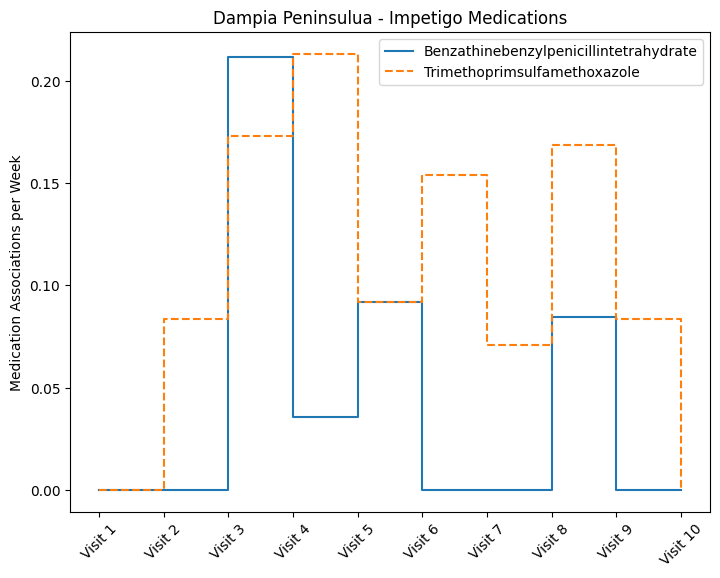

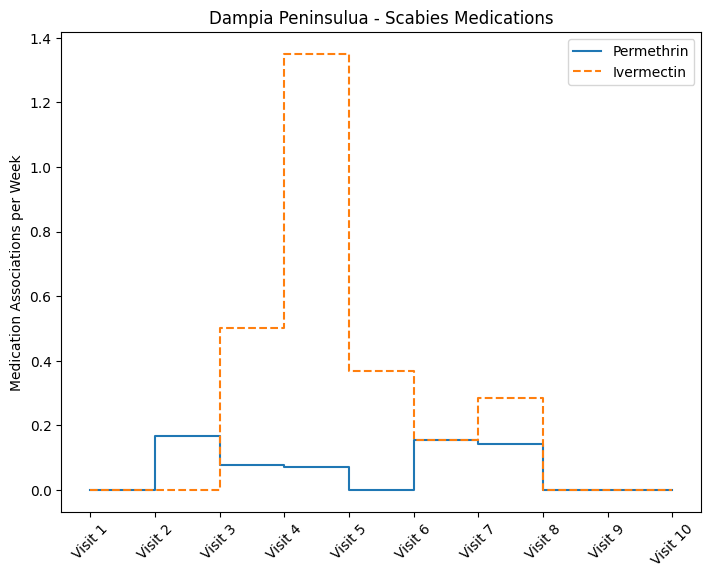

In [88]:
#Step chart
import matplotlib.pyplot as plt

headings = []
for a in range (1, 11):
    headings.append("Visit {}".format(a))

#label_array = ["Benzathinebenzylpenicillintetrahydrate", "Trimethoprimsulfamethoxazole" ]
#label_array = ["Permethrin ", "Ivermectin" ]


#IMPETIGO
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.step(headings, Impetigo_Benz, where='post', label = "Benzathinebenzylpenicillintetrahydrate")
ax.step(headings, Impetigo_Trim, where='post', linestyle='dashed', label = "Trimethoprimsulfamethoxazole")

plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
# plt.grid(True, linestyle="dashed")
plt.legend()

plt.title("Dampia Peninsulua - Impetigo Medications")
plt.ylabel("Medication Associations per Week")
# plt.xlabel("Date")
plt.savefig('Dampia Peninsulua - Impetigo Medications.png',dpi=300, bbox_inches = "tight")

plt.show()

#SCABIES
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.step(headings, Scabies_Perm, where='post', label = "Permethrin")
ax.step(headings, Scabies_Iver, where='post', linestyle='dashed', label = "Ivermectin")

plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
# plt.grid(True, linestyle="dashed")
plt.legend()

plt.title("Dampia Peninsulua - Scabies Medications")
plt.ylabel("Medication Associations per Week")
# plt.xlabel("Date")
plt.savefig('Dampia Peninsulua - Scabies Medications.png',dpi=300, bbox_inches = "tight")

plt.show()